In [ ]:
# 大陆深证股票3000点缠绕策略

## 原理 
1. 目前内地因经济下行，长线看跌，有看跌方向做长期保障。
2. 大陆为宏观调控下的 市场经济，因此政策线将滞跌，使股票围绕政策先波动
3. 2与1就形成了 主观与客观的背离
4. 可围绕政策线做波动，但长期看跌

## 交易对象
股票

## 交易周期
D, M

## 交易指标
PPI CPI 人口老龄化率 通胀指数 股票涨跌率 政策线

## 风险控制

## 交易策略


In [ ]:
# 中国 CPI 月率报告
import akshare as ak
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
print(macro_china_cpi_monthly_df)
print(macro_china_cpi_monthly_df.name)

In [ ]:
#物流景气指数
macro_china_lpi_index_df = ak.macro_china_lpi_index()
print(macro_china_lpi_index_df)

In [ ]:
import akshare as ak
import numpy as np
import random

# 取近30天指数
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


sh000001_close = ak.stock_zh_index_daily(symbol="sh000001")
end_index = sh000001_close.shape[0] - 360

sh000001_close = sh000001_close[end_index:]

# 获取大盘指数，转折点
def find_reverse_point(dates, line):
    reverse_point = []
    last_close = dates.iloc[0]['close']
    #print(last_close)
    for index, row in dates.iterrows():
        #print(row)
        curr_close = row['close']
        if last_close > line and curr_close < line:
            reverse_point.append((row['date'], last_close, curr_close, -1, index))
        if last_close < line and curr_close > line:
            reverse_point.append((row['date'], last_close, curr_close, 1, index))
        last_close = curr_close
    return reverse_point
    
    
reverse_points = find_reverse_point(sh000001_close, 3000)
reverse_marker_dates = []
reverse_marker_points = []
for reverse_point in reverse_points:
    reverse_marker_dates.append(reverse_point[0])
    reverse_marker_points.append(reverse_point[2])
    #plt.text(reverse_point[0], reverse_point[2], "%.3f" % reverse_point[2], c='r', pad=2)
    #plt.annotate("%.3f" % reverse_point[2],xy=(reverse_point[0],reverse_point[2]),xytext=(7,36),arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    #plt.annotate( "ttt" , xy=(reverse_point[0],reverse_point[2]),xytext=(2,4))
    
print(reverse_points)


mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
#print(type(sh000001_close))


plt.plot(sh000001_close['date'], sh000001_close['close'], label='大盘指数',color='blue')
plt.axhline(y=3000, label='3000point', color='yellow')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
#plt.gca().xaxis.set_major_locator(mdatesDayLocator())

last_date = sh000001_close.iloc[-1]['date']
last_point = sh000001_close.iloc[-1]['close']

for i in range(len(reverse_marker_dates)):
    varx = reverse_marker_dates[i]
    vary = reverse_marker_points[i]
    if i%2==1:
        plt.annotate("%.3f" % vary,xy=(varx,vary), xytext=(varx,vary+random.randint(4, 6)*50), \
                 arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=90", facecolor='blue'))
    else:
        plt.annotate("%.3f" % vary,xy=(varx,vary), xytext=(varx,vary-random.randint(4, 6)*50), \
                 arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90", facecolor='blue'))

plt.annotate("%.3f" % last_point,xy=(last_date,last_point), xytext=(last_date,last_point-random.randint(4, 6)*50), \
                 arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90", facecolor='blue'))

#import akshare as ak

plt.scatter(reverse_marker_dates, reverse_marker_points, marker='o', color='red')

plt.title("上证指数收盘价历史趋势")
plt.xlabel('时间:月')
plt.ylabel('收盘价')
plt.legend(loc='best')
plt.show()

offset = -2 #set by user!
#print(reverse_points[offset])
start_date = reverse_points[offset][0]
end_date = sh000001_close.iloc[-1]['date']

def set_date(df, key):
    date_list = df[key].to_list()
    date_index=[]
    for date_elem in date_list:
        date_index.append(date_elem.strftime('%Y-%m-%d'))
    return df.set_axis(date_index)

df = set_date(sh000001_close, 'date')
#print(sh000001_close)
start_date = reverse_points[offset][0]
end_date = sh000001_close.iloc[-1]['date']
start_price = df.loc[start_date.strftime('%Y-%m-%d'), 'close']
end_price = df.loc[end_date.strftime('%Y-%m-%d'), 'close']

rate = (start_price - end_price )/ end_price
print("start date:", start_date)
print("end date:", end_date)
print("rate: %.3f" % rate)

In [ ]:
import akshare as ak
import numpy as np
import random
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 


nameList = ['美年健康', '爱尔眼科', '华恒生物']
codeList = ['002044', '300015', '688639']

start_date = datetime.strptime('2023-12-12', "%Y-%m-%d")
end_date = datetime.strptime('2024-01-11', "%Y-%m-%d")

def set_date(df, key):
    date_list = df[key].to_list()
    date_index=[]
    for date_elem in date_list:
        date_index.append(date_elem.strftime('%Y-%m-%d'))
    return df.set_axis(date_index)

#定义随机生成颜色函数
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color ="#"+''.join([random.choice(colorArr) for i in range(6)])
    return color

def draw_one_code(ax, name, code, start_date, end_date):
    df = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=start_date.strftime('%Y%m%d'), end_date=end_date.strftime('%Y%m%d'), adjust="")
    df = set_date(df, '日期')
    start_price = df.loc[start_date.strftime('%Y-%m-%d'), '收盘']
    end_price = df.loc[end_date.strftime('%Y-%m-%d'), '收盘']
    rate = (start_price - end_price) / start_price
    rate_str = "%.3f" % rate
    ax.plot(df['日期'], df['收盘'], label=name + rate_str,color=randomcolor())
    
    
    plt.annotate("%.3f" % df.iloc[0]['收盘'],xy=(df.iloc[0]['日期'],df.iloc[0]['收盘']), xytext=(df.iloc[0]['日期'],df.iloc[0]['收盘'] +15), \
                 arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90", facecolor='blue'))
    plt.annotate("%.3f" % df.iloc[-1]['收盘'],xy=(df.iloc[-1]['日期'],df.iloc[0]['收盘']), xytext=(df.iloc[-1]['日期'],df.iloc[-1]['收盘'] +15), \
                 arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90", facecolor='blue'))
    
#print(stock_zh_a_hist_df)
mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)


for i in range(len(codeList)):
    draw_one_code(plt, nameList[i], codeList[i], start_date, end_date)


plt.title("股票历史趋势")
plt.ylabel('收盘价')
plt.xlabel('时间')
plt.tick_params(labelsize=15) 
plt.legend(loc='best')

#for index, row in stock_zh_a_hist_df.iterrows():
#    if(row['收盘'] >= row['开盘']):
#        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='red')
#    else:    
#        axVol.bar(row['日期'],row['成交量']/1000000,width = 0.5,color='green')
plt.show()

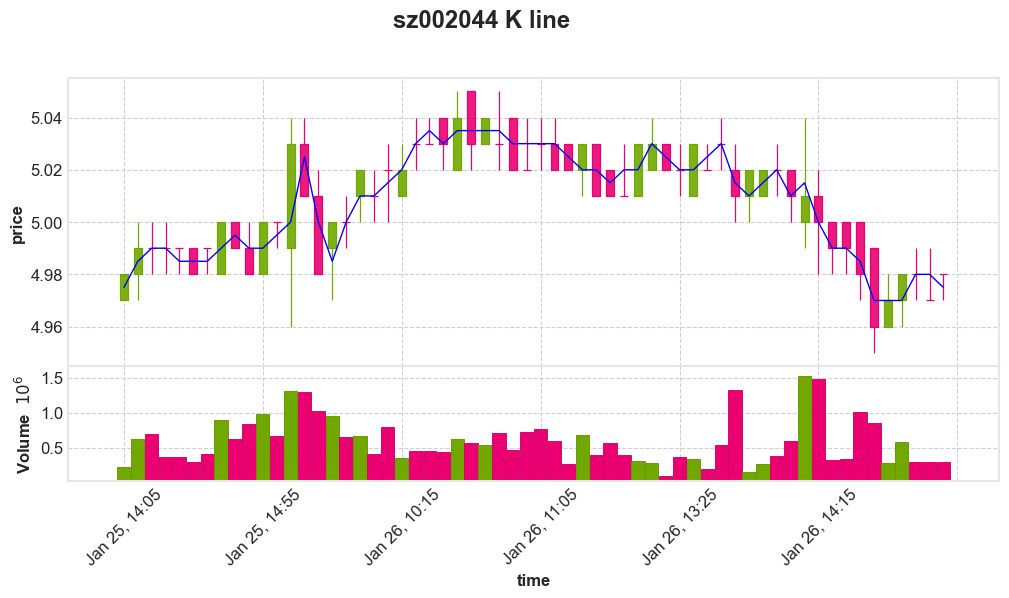

In [1]:
!pip install pandas
!pip install mplfinance
!pip install yfinance
!pip install akshare

import mplfinance as mpf
import pandas as pd
import yfinance as yf
import akshare as ak
from datetime import datetime
from pylab import mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

'''
df_new = df2[(df2['时间'] > '2021-08-03 09:35:00') & (df2['时间'] < '2021-08-03 15:00:00')]
df_new = df_new[['时间','开盘','最高','最低','收盘','成交量']]
df_new.columns = ['Date','Open','High','Low','Close','Volume']
df_new.set_index(["Date"], inplace=True)
'''

name_list = ['美年健康', '爱尔眼科', '华恒生物']
code_list = ['sz002044', '300015', '688639']
buy_price_list = [5.0, 20.0, 120.0]
buy_date_list = ['2023-12-13', '2023-12-13', '2023-12-13']


mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)


def plot_one_kline(code, name, period, adj, size):
    df = ak.stock_zh_a_minute(symbol=code, period=period, adjust=adj)
     
    if len(df) > size:
        df = df.iloc[0-size:]
        
    df = df.rename({
        "day": "Date",
        "open": "Open",
        "close": "Close",
        "low": "Low",
        "high": "High",
        "volume": "Volume",
    },axis=1,)
    #print(df)
    df['Volume'] =  pd.to_numeric(df['Volume'])
    df.index = pd.DatetimeIndex(df['Date'])
    df = df.drop('Date', axis=1)
    lines = [
        mpf.make_addplot((df["Low"]+df["High"])/2, color="b", width=1),
    ]
    mpf.plot(df, type="candle", title=f"%s K line" % code, ylabel="price", xlabel="time", style="binance", volume=True, \
             addplot=lines, figratio=(18,8))


plot_one_kline(code_list[0], name_list[0], 5, 'qfq', 60)


# 绘制动态实时K线图
#mpf.plot(data, type="candle", title=f"{symbol} K line",ylabel="价格", style="yahoo", show_nontrading=True)
